 # Adsorption of a Monomers

In [1]:
%pylab notebook
import lattice_gas as laga
import time
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


normalized number of adsorbed monomers 0.109375


<IPython.core.display.Javascript object>


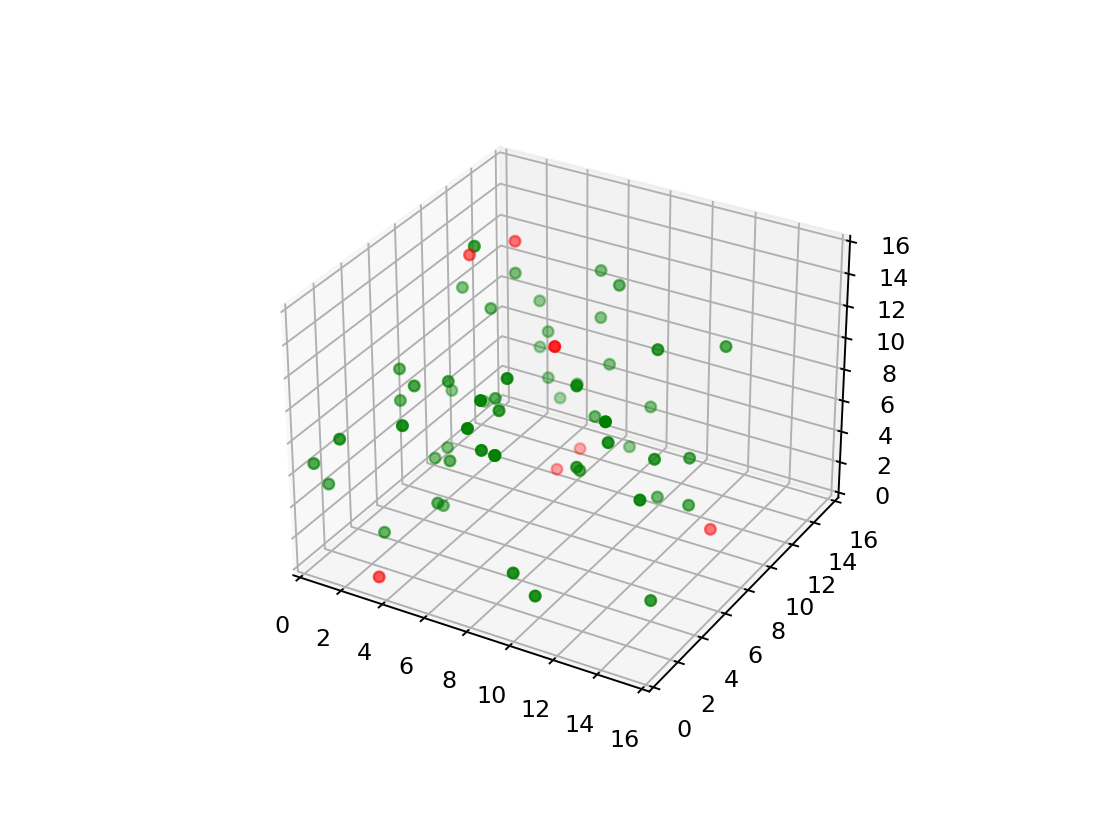

normalized number of adsorbed monomers 0.578125


<IPython.core.display.Javascript object>


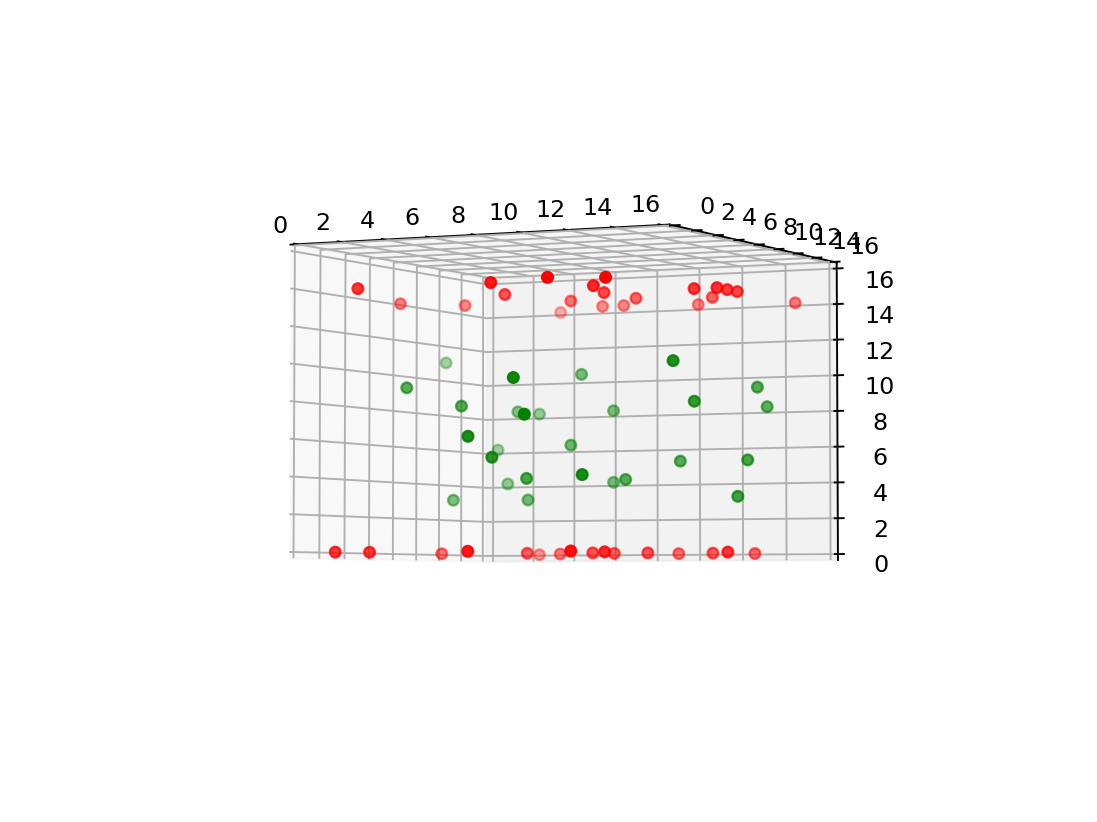

In [3]:
# try the laga module
box = [16,16,16]
periodic = [True, True, False]
numMonos = 64
delta = 8

testGas = laga.LatticeGasSimulator(box, periodic, delta)
for n in range(numMonos):
    newPos = np.random.randint(box[0]-1,size=(3))
    testGas.addMonomer(newPos, {})

print(f'normalized number of adsorbed monomers {laga.calculateWallContacts(testGas)}')
testGas.plotConfig()
testGas.performMCS(100)
print(f'normalized number of adsorbed monomers {laga.calculateWallContacts(testGas)}')
testGas.plotConfig()

In [31]:
box = [32,32,32]
periodic = [True, True, False]
numMonos = 256
delta = [0.0, 0.1,0.2,0.3,0.4, 0.5, 0.7,0.8, 1,2,3,5,8,10]
eQuilTime = 1000
n_sample = 500
n_timePerSample = 200

meanAdsorpedMonomers = np.zeros((len(delta)))
start=time.process_time()
# setup system
for n in range(numMonos):
    gasSimulator = laga.LatticeGasSimulator(box, periodic, 0.0)
    newPos = np.random.randint(box[0]-1,size=(3))
    gasSimulator.addMonomer(newPos, {})

# sample Nads/N
for i, d in enumerate(delta):
    gasSimulator.delta = d
    gasSimulator.probabilityMultiplicator = np.exp(-gasSimulator.delta)
    
    gasSimulator.performMCS(eQuilTime)
    
    meanNadsN = 0.0
    
    for n in range(n_sample):
        gasSimulator.performMCS(n_timePerSample)
        meanNadsN += laga.calculateWallContacts(gasSimulator)
        
    meanAdsorpedMonomers[i] = (meanNadsN/n_sample)
    print(f"delta= {d}: Nads/N = {meanAdsorpedMonomers[i]}")

# store data
data = np.vstack((np.array(delta), meanAdsorpedMonomers) )

np.savetxt("gas_adsoprtion_n256.dat", data)
print("Simulation time {0:.2f}s ".format( time.process_time()-start ))

delta= 0.0: Nads/N = 0.058
delta= 0.1: Nads/N = 0.062
delta= 0.2: Nads/N = 0.102
delta= 0.3: Nads/N = 0.094
delta= 0.4: Nads/N = 0.094
delta= 0.5: Nads/N = 0.118
delta= 0.7: Nads/N = 0.142
delta= 0.8: Nads/N = 0.13
delta= 1: Nads/N = 0.158
delta= 2: Nads/N = 0.322
delta= 3: Nads/N = 0.632
delta= 5: Nads/N = 0.938
delta= 8: Nads/N = 1.0
delta= 10: Nads/N = 1.0
Simulation time 54.31s 


<IPython.core.display.Javascript object>


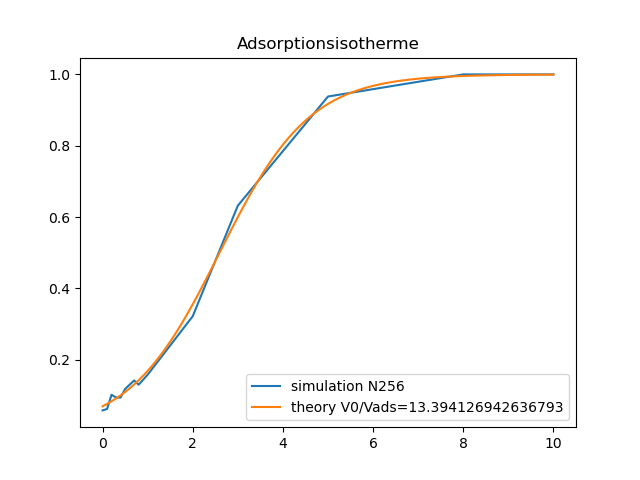

In [34]:
figure()

plot(data[0],data[1],label=f"simulation N{numMonos}")
fit_params, cov = curve_fit(laga.adsorptIsothermTheo, data[0], data[1] )
x = np.linspace(0,10,100)
plot(x,laga.adsorptIsothermTheo(x,fit_params[0]),label=f"theory V0/Vads={fit_params[0]}")

legend(loc="best")
title("Adsorptionsisotherme")
show()